# Matplotlib Questions


1. `How does the average satisfaction level change with increasing years of employment? [Line and Scatter Plot]`
2. `How many employees have spent a specific number of years (time spent in the company)? [Bar Plot]`
3. `What is the distribution of satisfaction levels among employees?` [Histogram]
4. `What is the distribution of work accidents among departments?` [___________]
5. `What is the distribution of promotions based on departments?`  [___________]
6. `How does employee satisfaction vary across different departments?` [Box Plot]
7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`[Bubble Plot]
8. `How are the numerical variables correlated with each other?`
9. `How to create different scatter plots under single matplotlib figure?`

 <!-- Numpy Pandas and Matplotlib  -->

Column names: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


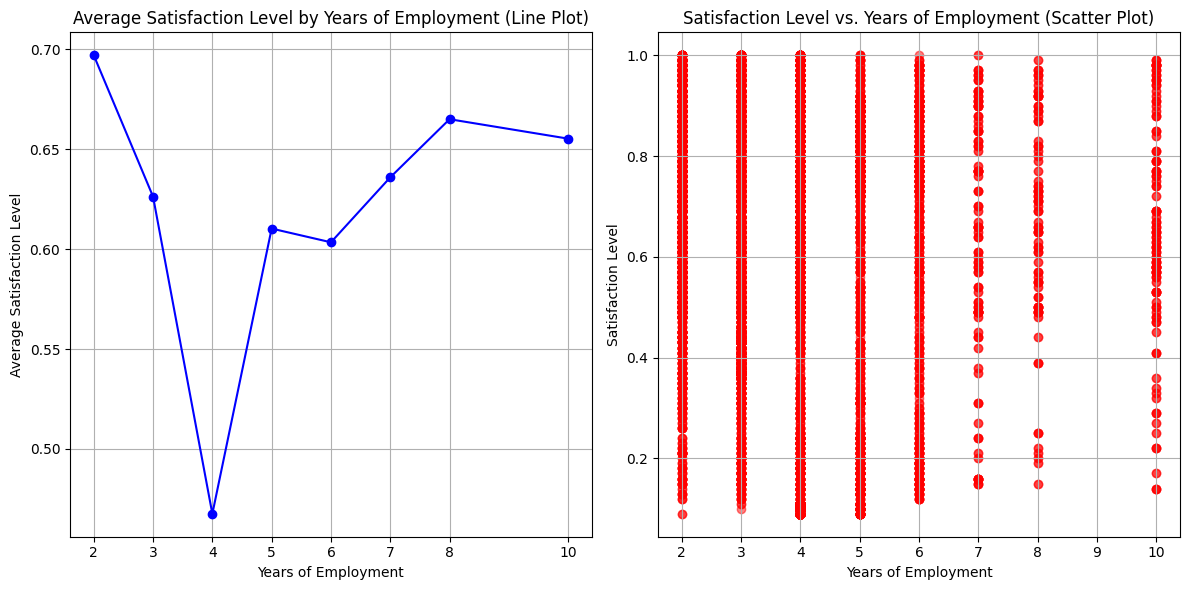

In [12]:
# How does the average satisfaction level change with increasing years of employment?
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Check the column names to identify the correct columns
print("Column names:", df.columns)

# Group the data by 'time_spend_company' (assuming this is equivalent to 'YearsEmployed') and calculate the average satisfaction level
average_satisfaction_by_years = df.groupby('time_spend_company')['satisfaction_level'].mean()

# Plot the results
plt.figure(figsize=(12, 6))

# Line plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
average_satisfaction_by_years.plot(marker='o', color='b', linestyle='-')
plt.title('Average Satisfaction Level by Years of Employment (Line Plot)')
plt.xlabel('Years of Employment')
plt.ylabel('Average Satisfaction Level')
plt.grid(True)
plt.xticks(average_satisfaction_by_years.index)  # Set x-ticks to be the years of employment

# Scatter plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(df['time_spend_company'], df['satisfaction_level'], color='r', alpha=0.5)
plt.title('Satisfaction Level vs. Years of Employment (Scatter Plot)')
plt.xlabel('Years of Employment')
plt.ylabel('Satisfaction Level')
plt.grid(True)

plt.tight_layout()
plt.show()



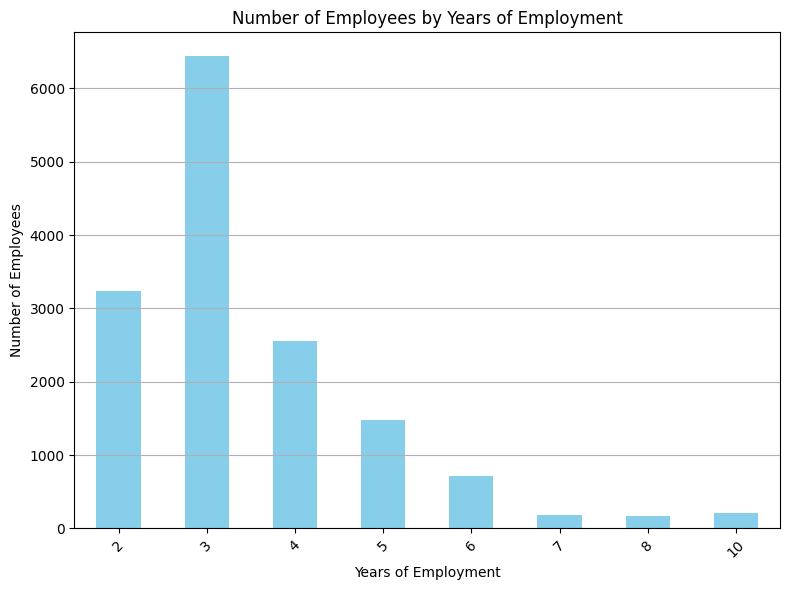

In [13]:
# How many employees have spent a specific number of years (time spent in the company)?

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Count the number of employees for each value of 'time_spend_company'
employee_count_by_years = df['time_spend_company'].value_counts().sort_index()


# Plot the results
plt.figure(figsize=(8, 6))
employee_count_by_years.plot(kind='bar', color='skyblue')
plt.title('Number of Employees by Years of Employment')
plt.xlabel('Years of Employment')
plt.ylabel('Number of Employees')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


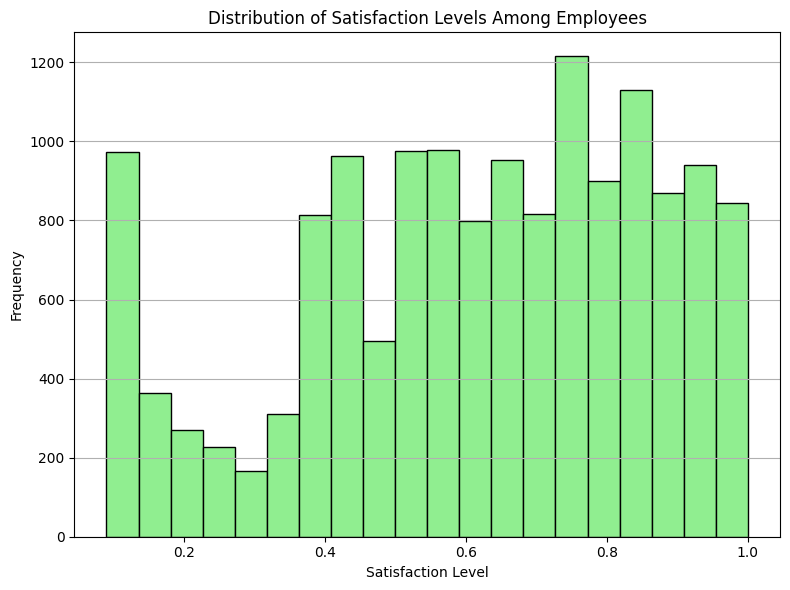

In [14]:
#  what is the distribution of satisfaction levels among employees?

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Plot the histogram of satisfaction levels
plt.figure(figsize=(8, 6))
plt.hist(df['satisfaction_level'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Satisfaction Levels Among Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



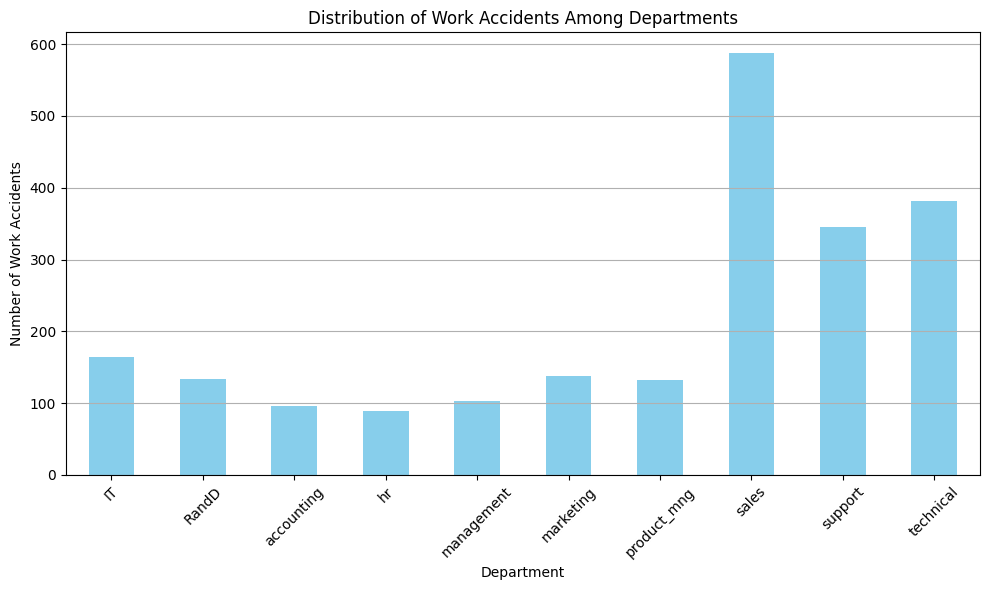

In [15]:
# What is the distribution of work accidents among departments?

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Group the data by department and count the number of work accidents
work_accidents_by_department = df.groupby('Department')['Work_accident'].sum()

# Plot the results
plt.figure(figsize=(10, 6))
work_accidents_by_department.plot(kind='bar', color='skyblue')
plt.title('Distribution of Work Accidents Among Departments')
plt.xlabel('Department')
plt.ylabel('Number of Work Accidents')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [7]:
#5. What is the distribution of promotions based on departments?[pie chart]`
import pandas as pd
import matplotlib.pyplot as plt



# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Replace 'sales' with the correct column name for departments
department_column_name = 'sales'  # Replace 'sales' with the correct column name

# Count the number of promotions in each department
promotion_counts = df[df['promotion_last_5years'] == 1][department_column_name].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Promotions Based on Departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


KeyError: 'sales'

<Figure size 1000x600 with 0 Axes>

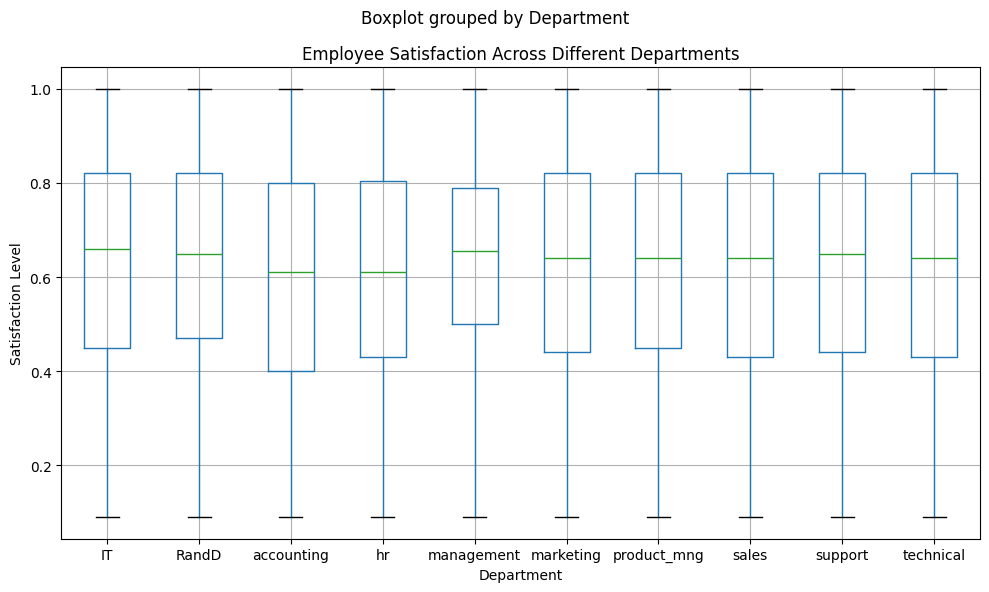

In [3]:
# How does employee satisfaction vary across different departments?` [Box Plot]

# Create a box plot to show employee satisfaction across different departments
plt.figure(figsize=(10, 6))
df.boxplot(column='satisfaction_level', by='Department',vert=False, figsize=(10,6))
plt.title('Employee Satisfaction Across Different Departments')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
# plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

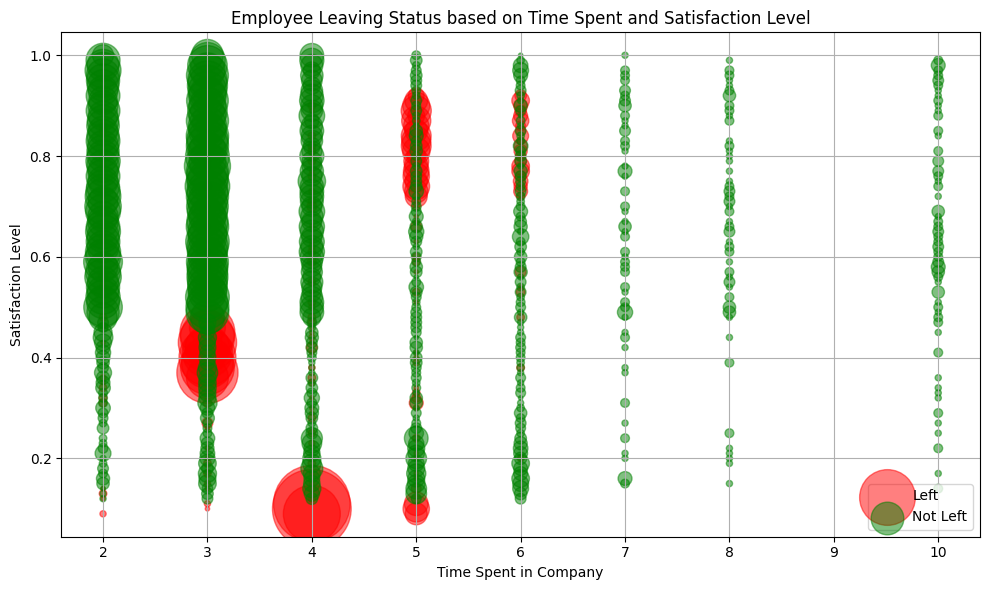

In [17]:
# Figure out employee leaving status (time_spend vs satisfaction_level vs left?`[Bubble Plot]

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Group the data by 'time_spend_company', 'satisfaction_level', and 'left' columns
grouped_data = df.groupby(['time_spend_company', 'satisfaction_level', 'left']).size().reset_index(name='count')

# Separate data for employees who left and those who didn't
left_data = grouped_data[grouped_data['left'] == 1]
not_left_data = grouped_data[grouped_data['left'] == 0]

# Plot the bubble plot
plt.figure(figsize=(10, 6))

# Plot bubbles for employees who left
plt.scatter(left_data['time_spend_company'], left_data['satisfaction_level'], s=left_data['count']*10, c='red', alpha=0.5, label='Left')

# Plot bubbles for employees who didn't leave
plt.scatter(not_left_data['time_spend_company'], not_left_data['satisfaction_level'], s=not_left_data['count']*10, c='green', alpha=0.5, label='Not Left')

# Add labels and legend
plt.title('Employee Leaving Status based on Time Spent and Satisfaction Level')
plt.xlabel('Time Spent in Company')
plt.ylabel('Satisfaction Level')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


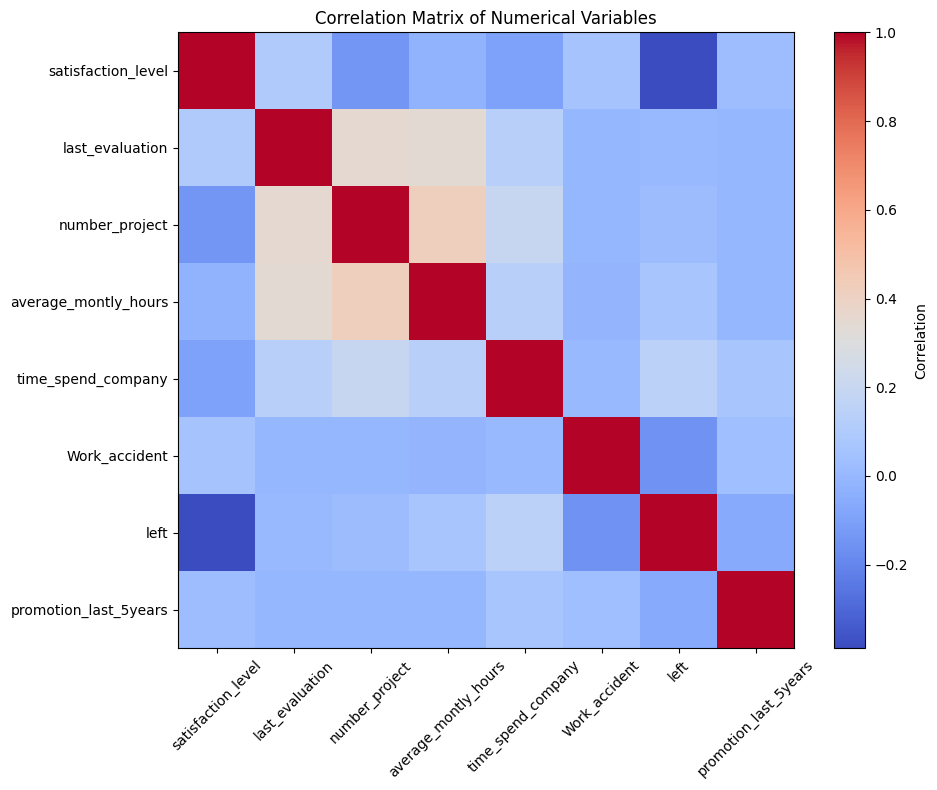

In [18]:
# `How are the numerical variables correlated with each other?`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(ticks=np.arange(len(numerical_columns.columns)), labels=numerical_columns.columns, rotation=45)
plt.yticks(ticks=np.arange(len(numerical_columns.columns)), labels=numerical_columns.columns)
plt.tight_layout()
plt.show()


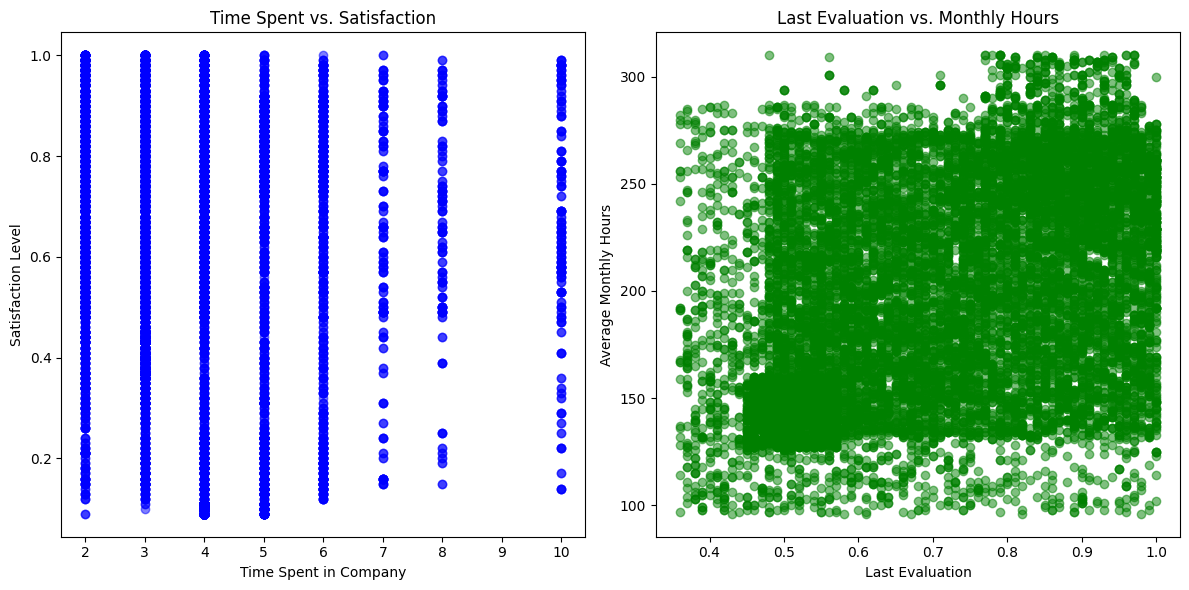

In [19]:
# How to create different scatter plots under single matplotlib figure?`

import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('./HR_comma_sep - HR_comma_sep.csv')

# Create a figure and divide it into subplots
plt.figure(figsize=(12, 6))

# Scatter plot 1: Time Spent in Company vs. Satisfaction Level
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.scatter(df['time_spend_company'], df['satisfaction_level'], color='blue', alpha=0.5)
plt.title('Time Spent vs. Satisfaction')
plt.xlabel('Time Spent in Company')
plt.ylabel('Satisfaction Level')

# Scatter plot 2: Last Evaluation vs. Monthly Hours
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.scatter(df['last_evaluation'], df['average_montly_hours'], color='green', alpha=0.5)
plt.title('Last Evaluation vs. Monthly Hours')
plt.xlabel('Last Evaluation')
plt.ylabel('Average Monthly Hours')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
